In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**🧥 Fashion Image Classification using Deep Learning on Fashion MNIST Dataset**
- The goal of this project is to develop a deep learning model capable of accurately classifying grayscale images of clothing items from the Fashion MNIST dataset into predefined categories such as shirts, sneakers, trousers, and dresses. The model should learn visual patterns and textures that distinguish one category from another, achieving high accuracy and robustness against variations in clothing style, shape, and lighting.

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


In [3]:
import os
os.environ["PYTHONHISTFILE"] = "/tmp/python_history"

# **Import the Fashion MNIST dataset**
This guide uses the [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) dataset which contains 70,000 grayscale images in 10 catagories. The Images show individual articles od clothing at low resolution(28 by 28 pixels), as seen here:
![image.png](attachment:66dbbf75-7859-4da4-9c87-0fc788774134.png)![image.png](attachment:b996e234-360b-466f-9228-537f4312bae1.png)

# **Import and load the Fashion MNIST data directly from Tensorflow**

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
print(train_images.shape)  # (60000, 28, 28)
print(train_labels.shape)  # (60000,)
print(test_images.shape)   # (10000, 28, 28)
print(test_labels.shape)   # (10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Loading the dataset returns four NumPy arrays:
- The train_images and train_labels arrays are the training set-the data the model uses to learn.
- The Model is tested against the test set, test_images, and test_labels arrays.
The Images are 28*28 NumPy arrays, with pixel values ranging from 0 to 255. The Labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:
| Label | Class Name  | Description / Example Items       |
| :---: | ----------- | --------------------------------- |
| **0** | T-shirt/top | T-shirts, tank tops, blouses      |
| **1** | Trouser     | Pants, jeans, leggings            |
| **2** | Pullover    | Sweaters, pullovers, jumpers      |
| **3** | Dress       | Casual and formal dresses         |
| **4** | Coat        | Overcoats, trench coats, jackets  |
| **5** | Sandal      | Open-toe footwear, flat sandals   |
| **6** | Shirt       | Button-up shirts, collared shirts |
| **7** | Sneaker     | Running shoes, sports shoes       |
| **8** | Bag         | Handbags, backpacks, purses       |
| **9** | Ankle boot  | Short boots, leather ankle shoes  |


In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

# **Explore the Data**
Let's Explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28*28 pixels:

In [7]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [8]:
len(train_labels)

60000

Each Label is an integer between 0 and 9

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28*28 pixels:

In [10]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [11]:
len(test_labels)

10000

# **Preprocess the data**
The Data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

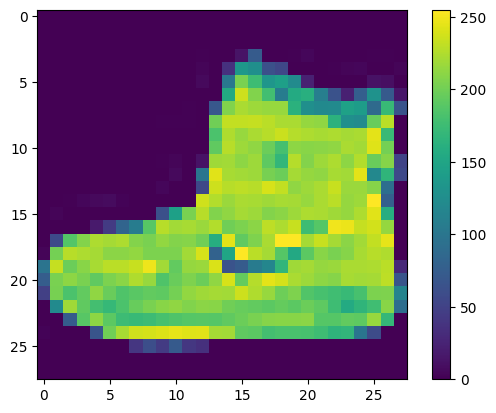

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

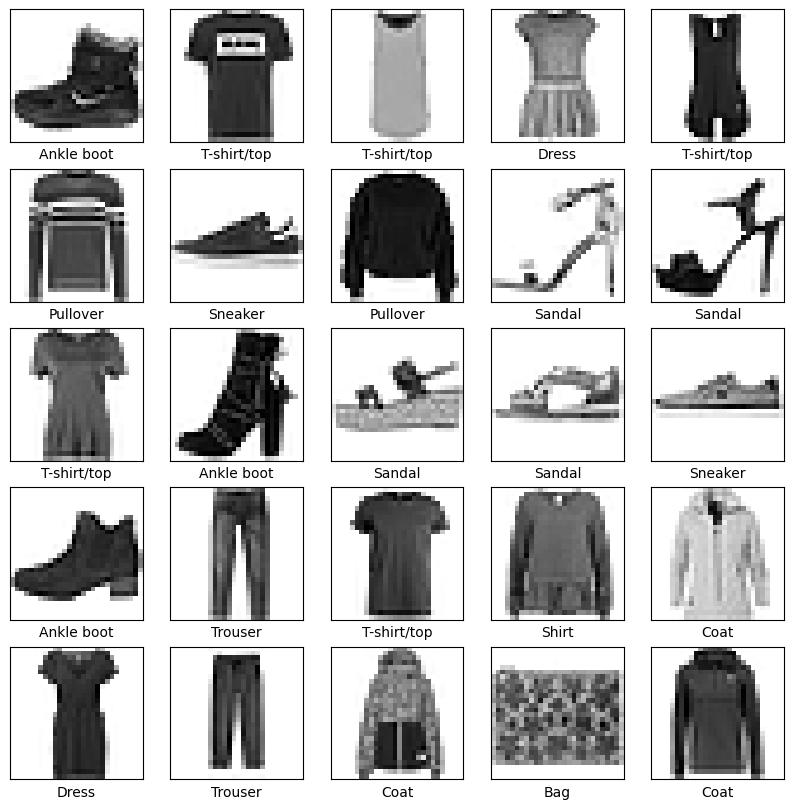

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Build the model**

Building the neural network requires configuring the layers of the model, then compiling the model.

## Set up the layers

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # for converting image to vector for Dense layers
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(10, activation= 'softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- tf.keras.layers.Flatten -transforms the format of the images froma two-dimensional array.(of 28 by 28 pixels)to a one-dimensional array(oo 28*28 = 784 pixels).
- This layer has no parameters to learn; It only reformats the data.

In [22]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# **Train the model**

In [23]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8728 - loss: 0.3675
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8754 - loss: 0.3585
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8768 - loss: 0.3513
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8786 - loss: 0.3454
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8812 - loss: 0.3403
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8798 - loss: 0.3389
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8823 - loss: 0.3363
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8842 - loss: 0.3293
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8843 - loss: 0.3273
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8876 - loss: 0.3190


# Evaluate Accuracy
Next, compare how the model performs on the test dataset:

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8555 - loss: 0.4108

Test accuracy: 0.8554999828338623


# Make Predictions

In [24]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [25]:
predictions[0]

array([2.3379296e-05, 6.7559841e-07, 2.1478307e-05, 2.9309431e-06,
       3.9943284e-06, 4.3542195e-02, 1.9929776e-04, 5.5038087e-02,
       1.6632279e-03, 8.9950478e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [26]:
np.argmax(predictions[0])

np.int64(9)

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label show that this classification is correct.

In [27]:
test_labels[0]

np.uint8(9)

Define function to graph the full set of 10 class prediciton:

In [28]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# **Verify predictions**
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage(out of 100) for the predicted label.

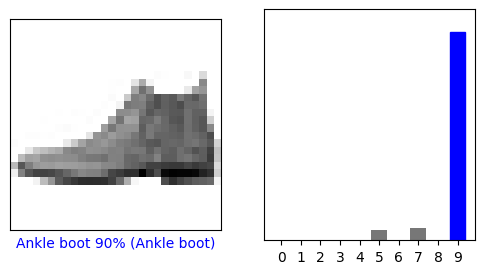

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

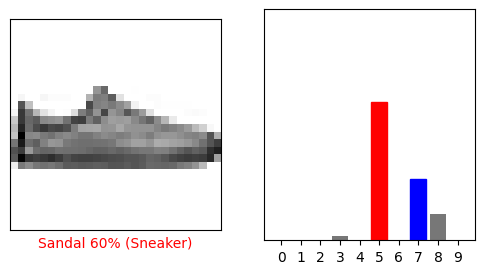

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. note that the model can be wrong even when very confident.

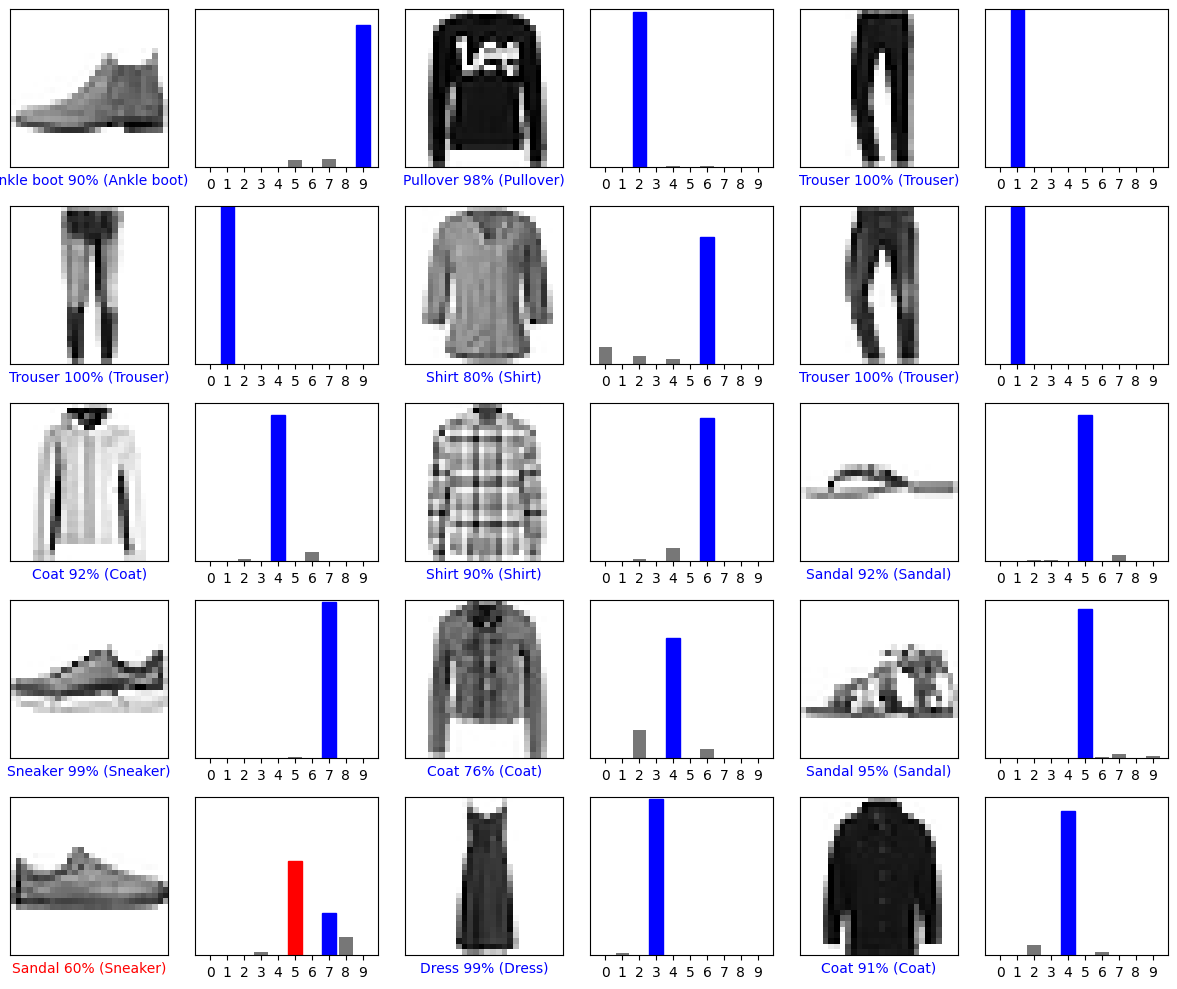

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictionin red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [32]:
model.save("clothing_model.keras")

In [33]:
model.save("clothing_model.h5")

## **Loading the saved model**

In [36]:
new_model = tf.keras.models.load_model('clothing_model.keras')
new_model

<Sequential name=sequential, built=True>

In [37]:
new_predictions = new_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


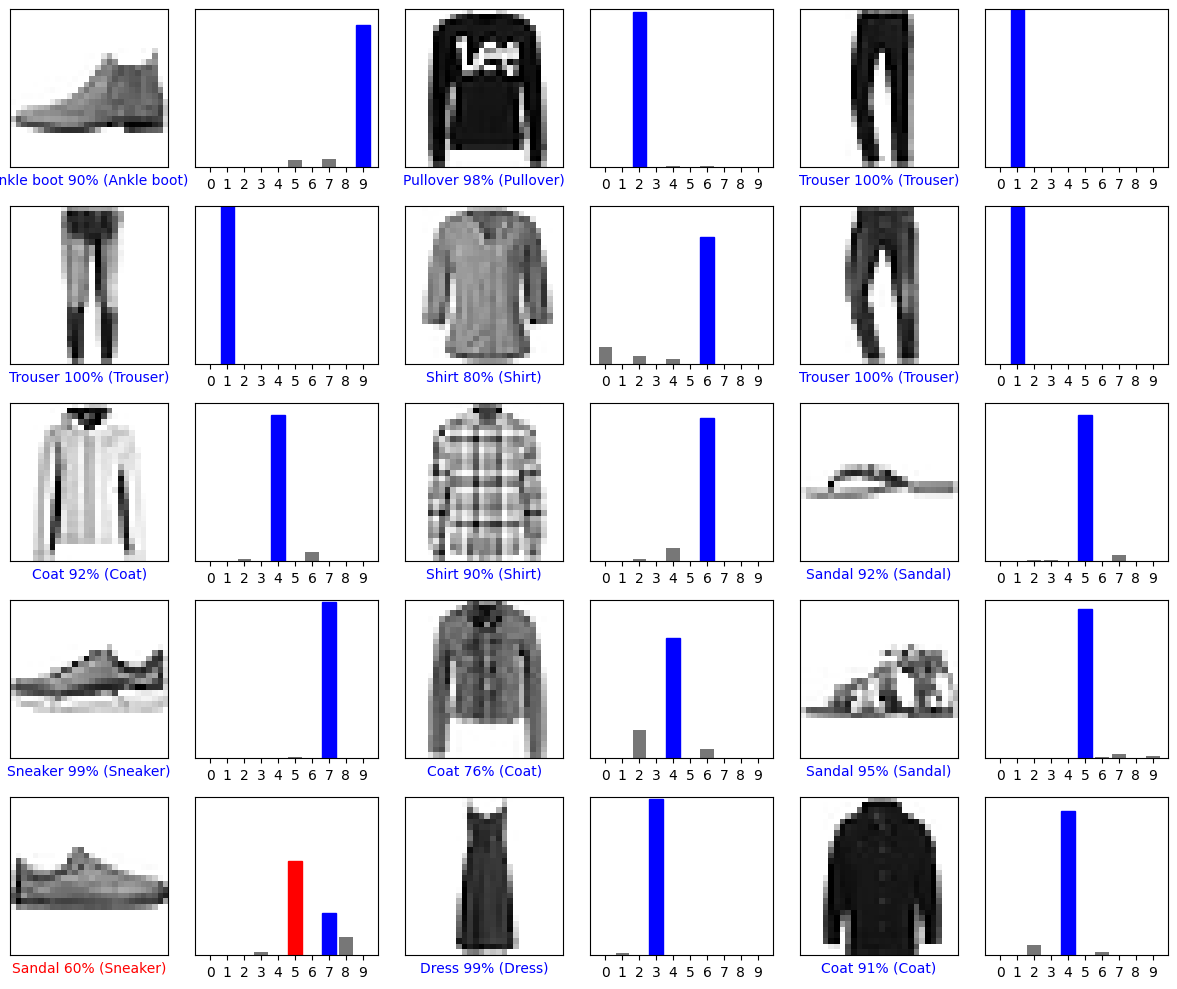

In [38]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictionin red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()